<a href="https://colab.research.google.com/github/Pnwankwo2/neural-network-challenge-1/blob/main/Copy_of_student_loans_with_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Student Loan Risk with Deep Learning

In [ ]:
# Imports
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from pathlib import Path

---

## Prepare the data to be used on a neural network model

### Step 1: Read the `student-loans.csv` file into a Pandas DataFrame. Review the DataFrame, looking for columns that could eventually define your features and target variables.   

In [ ]:
# Read the csv into a Pandas DataFrame
file_path = "https://static.bc-edx.com/ai/ail-v-1-0/m18/lms/datasets/student-loans.csv"
loans_df = pd.read_csv(file_path)

# Review the DataFrame
loans_df.head()

,payment_history,location_parameter,stem_degree_score,gpa_ranking,alumni_success,study_major_code,time_to_completion,finance_workshop_score,cohort_ranking,total_loan_score,financial_aid_score,credit_ranking
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [ ]:
# Review the data types associated with the columns
loans_df.dtypes

,0
payment_history,float64
location_parameter,float64
stem_degree_score,float64
gpa_ranking,float64
alumni_success,float64
study_major_code,float64
time_to_completion,float64
finance_workshop_score,float64
cohort_ranking,float64
total_loan_score,float64


In [ ]:
# Check the credit_ranking value counts
loans_df["credit_ranking"].value_counts()

,count
credit_ranking,
1,855
0,744


### Step 2: Using the preprocessed data, create the features (`X`) and target (`y`) datasets. The target dataset should be defined by the preprocessed DataFrame column “credit_ranking”. The remaining columns should define the features dataset.

In [ ]:
# Define the target set y using the credit_ranking column

y = loans_df["credit_ranking"]
# Display a sample of y
loans_df["credit_ranking"].head()


,credit_ranking
0,0
1,0
2,0
3,1
4,0


In [ ]:
# Define features set X by selecting all columns but credit_ranking
X = loans_df.drop(columns=["credit_ranking"])

# Review the features DataFrame
loans_df.head()

,payment_history,location_parameter,stem_degree_score,gpa_ranking,alumni_success,study_major_code,time_to_completion,finance_workshop_score,cohort_ranking,total_loan_score,financial_aid_score,credit_ranking
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


### Step 3: Split the features and target sets into training and testing datasets.


In [ ]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
# Assign the function a random_state equal to 1



### Step 4: Use scikit-learn's `StandardScaler` to scale the features data.

In [ ]:
# Create a StandardScaler instance
standard_scaler = StandardScaler()
standard_scaler.fit(X_train)
X_train = standard_scaler.transform(X_train)
X_test = standard_scaler.transform(X_test)

# Fit the scaler to the features training dataset
standard_scaler.fit(X_train)
standard_scaler.fit(X_test)

# Fit the scaler to the features training dataset
X_train_scaled = standard_scaler.transform(X_train)
X_test_scaled = standard_scaler.transform(X_test)


# Fit the scaler to the features training dataset
X_scaler = standard_scaler.fit(X_train)

# Fit the scaler to the features training dataset
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

#Re-train the model with scaled features
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2)





Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4462 - loss: 8.9259 - val_accuracy: 0.4727 - val_loss: 8.4998
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4607 - loss: 8.6926 - val_accuracy: 0.4727 - val_loss: 8.4998
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4541 - loss: 8.7986 - val_accuracy: 0.4727 - val_loss: 8.4998
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4497 - loss: 8.8690 - val_accuracy: 0.4727 - val_loss: 8.4998
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4502 - loss: 8.8621 - val_accuracy: 0.4727 - val_loss: 8.4998
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4662 - loss: 8.6031 - val_accuracy: 0.4727 - val_loss: 8.4998
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4434 - loss: 8.9719 - val_accuracy: 0.4727 - val_loss: 8.4998
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4712 - loss: 8.5239 - val_accuracy: 0.4727 - v

---

## Compile and Evaluate a Model Using a Neural Network

### Step 1: Create a deep neural network by assigning the number of input features, the number of layers, and the number of neurons on each layer using Tensorflow’s Keras.

> **Hint** You can start with a two-layer deep neural network model that uses the `relu` activation function for both layers.


In [ ]:
# Define the the number of inputs (features) to the model
number_of_outputs = 1 if y_train.nunique() == 2 else y_train.nunique()
number_of_inputs = X_train.shape[1]
number_of_features = X_train.shape[1]

# Review the number of features
number_of_features = X_train.shape[1]
print(number_of_features)





11


In [ ]:
# Define the number of hidden nodes for the first hidden layer
# Calculate the number of hidden nodes
number_of_nodes = 1
number_of_hidden_nodes = (number_of_features + 1) // 2

# Print the number of hidden nodes
number_of_outputs = 1
print("Number of hidden nodes for the first hidden layer:", number_of_hidden_nodes)
number_of_hidden_nodes = (number_of_features + number_of_outputs) // 6
print("Number of hidden nodes for the first hidden layer:", number_of_hidden_nodes)


# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer2 = (number_of_hidden_nodes + 1) // 2

# Print the number of hidden nodes in the second hidden layer
print("Number of hidden nodes for the second hidden layer:", hidden_nodes_layer2)


# Define the number of neurons in the output layer


Number of hidden nodes for the first hidden layer: 6
Number of hidden nodes for the first hidden layer: 2
Number of hidden nodes for the second hidden layer: 1


In [ ]:
# Create the Sequential model instance
model = Sequential()


# Add the first hidden layer
first_hidden_layer = Dense(units=number_of_hidden_nodes, input_dim=number_of_features, activation="relu")
model.add(first_hidden_layer)


# Add the second hidden layer
second_hidden_layer = Dense(units=hidden_nodes_layer2, activation="relu")
model.add(second_hidden_layer)

# Add the output layer to the model specifying the number of output neurons and activation function
ouput_layer = Dense(units=number_of_outputs, activation="relu")
model.add(ouput_layer)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Display the Sequential model summary
print

<function print>

### Step 2: Compile and fit the model using the `binary_crossentropy` loss function, the `adam` optimizer, and the `accuracy` evaluation metric.


In [ ]:
# Compile the Sequential model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
# Fit the model using 50 epochs and the training data
model.fit(X_train_scaled, y_train, epochs=50)



Epoch 1/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4577 - loss: 8.7407
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4492 - loss: 8.8786
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4675 - loss: 8.5833
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4582 - loss: 8.7326
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4642 - loss: 8.6358
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4788 - loss: 8.4005
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4553 - loss: 8.7799
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4697 - loss: 8.5475
Epoch 9/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4466 - loss: 8.9192
Epoch 10/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4472 - loss: 8.9105
Epoch 11/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4503 - loss: 8.8604
Epoch 12/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4747 - lo

### Step 3: Evaluate the model using the test data to determine the model’s loss and accuracy.


In [ ]:
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = model.evaluate(X_test_scaled, y_test, verbose=2)

# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")


# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

10/10 - 0s - 3ms/step - accuracy: 0.4812 - loss: 8.3613
Loss: 8.361261367797852, Accuracy: 0.48124998807907104
Loss: 8.361261367797852, Accuracy: 0.48124998807907104


### Step 4: Save and export your model to a keras file, and name the file `student_loans.keras`.


In [ ]:
# Set the model's file path
file_path = "student_loans.keras"

# Export your model to a HDF5 file
model.save(file_path)


# Export your model to a keras file
model.save(file_path)


---
## Predict Loan Repayment Success by Using your Neural Network Model

### Step 1: Reload your saved model.

In [ ]:
# Set the model's file path


# Load the model to a new object


### Step 2: Make predictions on the testing data and save the predictions to a DataFrame.

In [ ]:
# Make predictions with the test data
predictions = model.predict(X_test_scaled)

# Create a DataFrame with the predictions
df_predictions = pd.DataFrame(predictions)

# Review the DataFrame
df_predictions.head()


# Display a sample of the predictions
df_predictions.head()

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series[0]
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 0}, axis=1)
              .sort_values(0, ascending=True))
  xs = counted[0]
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_0.sort_values(0, ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel(0)
_ = plt.ylabel('count()')

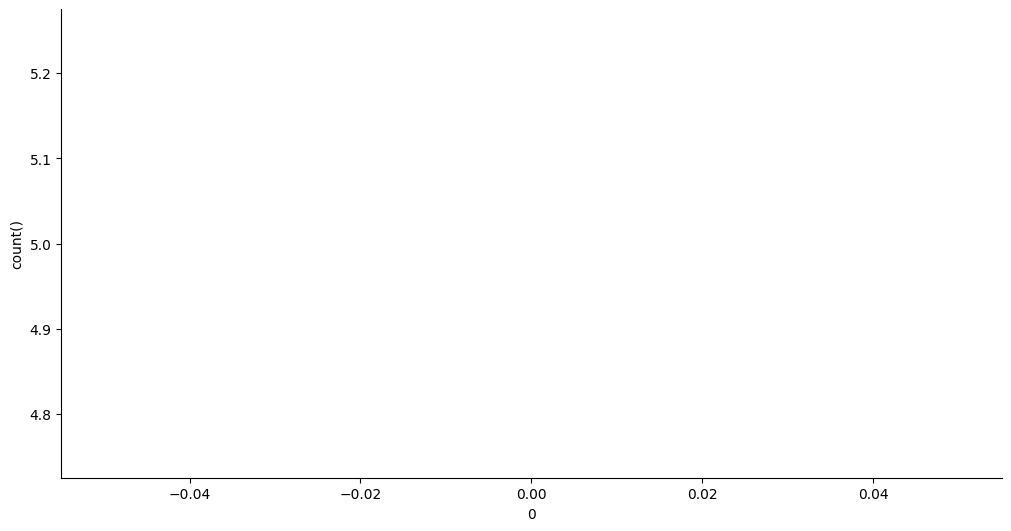

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series[0]
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 0}, axis=1)
              .sort_values(0, ascending=True))
  xs = counted[0]
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_0.sort_values(0, ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel(0)
_ = plt.ylabel('count()')

In [ ]:
# Save the predictions to a DataFrame and round the predictions to binary results
df_predictions = pd.DataFrame(predictions)
df_predictions = df_predictions.round()

# Review the DataFrame
df_predictions.head()



,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


### Step 4: Display a classification report with the y test data and predictions

In [ ]:
# Print the classification report with the y test data and predictions


              precision    recall  f1-score   support

           0       0.70      0.76      0.73       188
           1       0.77      0.72      0.74       212

    accuracy                           0.73       400
   macro avg       0.74      0.74      0.73       400
weighted avg       0.74      0.73      0.74       400



---
## Discuss creating a recommendation system for student loans

Briefly answer the following questions in the space provided:

1. Describe the data that you would need to collect to build a recommendation system to recommend student loan options for students. Explain why this data would be relevant and appropriate.

2. Based on the data you chose to use in this recommendation system, would your model be using collaborative filtering, content-based filtering, or context-based filtering? Justify why the data you selected would be suitable for your choice of filtering method.

3. Describe two real-world challenges that you would take into consideration while building a recommendation system for student loans. Explain why these challenges would be of concern for a student loan recommendation system.

**1. Describe the data that you would need to collect to build a recommendation system to recommend student loan options for students. Explain why this data would be relevant and appropriate.**


**2. Based on the data you chose to use in this recommendation system, would your model be using collaborative filtering, content-based filtering, or context-based filtering? Justify why the data you selected would be suitable for your choice of filtering method.**


**3. Describe two real-world challenges that you would take into consideration while building a recommendation system for student loans. Explain why these challenges would be of concern for a student loan recommendation system.**

